# Capstone Project: Part 2A EDA

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import os
import re
import plotly.express as px 

import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy
import geopandas as gpd
import json

In [2]:
# read in training and testing set
train = pd.read_csv('../Data/processed_data/train.csv')
test = pd.read_csv('../Data/processed_data/test.csv')

In [3]:
# combining train and testing set for EDA purposes
tdor = pd.concat([train, test], ignore_index=True, axis=0)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            3082 non-null   object 
 1   age             3082 non-null   float64
 2   date            3082 non-null   object 
 3   state_province  3081 non-null   object 
 4   country         3082 non-null   object 
 5   latitude        3082 non-null   float64
 6   longitude       3082 non-null   float64
 7   category        3082 non-null   object 
 8   cause_of_death  3082 non-null   object 
 9   description     3082 non-null   object 
 10  year            3082 non-null   float64
 11  city            3082 non-null   object 
 12  violence        3082 non-null   int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 313.1+ KB


In [5]:
train.dropna(inplace=True)

In [6]:
train.drop(columns = ['name','description'])

,age,date,state_province,country,latitude,longitude,category,cause_of_death,year,city,violence
0,22.0,2021-06-24,Piaui,Brazil,-4.248284,-41.775748,violence,shot,2021.0,Piripiri,1
1,30.0,2018-08-30,Puebla,Mexico,19.432778,-97.687500,violence,shot,2018.0,Libres,1
2,37.0,2012-04-29,California,United States of America,37.804828,-122.272480,violence,shot,2012.0,Oakland,1
3,22.0,2022-06-24,La Guajira,Colombia,10.880083,-72.844194,violence,shot,2022.0,Fonseca,1
4,38.0,2016-01-17,Bahia,Brazil,-10.460251,-40.189151,uncategorised,not reported,2016.0,Senhor do Bonfim,0
...,...,...,...,...,...,...,...,...,...,...,...
3077,35.0,2013-12-25,Maranhao,Brazil,-4.252454,-43.010780,violence,murdered,2013.0,Coelho Neto,1
3078,30.0,2021-04-30,Minas Gerais,Brazil,-21.405014,-45.948974,violence,shot,2021.0,Alfenas,1
3079,23.0,2014-09-09,Sao Paulo,Brazil,-23.099204,-45.707645,violence,thrown from a vehicle,2014.0,Cacapava,1
3080,40.0,2011-02-24,Sao Paulo,Brazil,-23.689150,-46.562830,violence,shot,2011.0,Sao Bernardo do Campo,1


In [9]:
train['deaths']=1

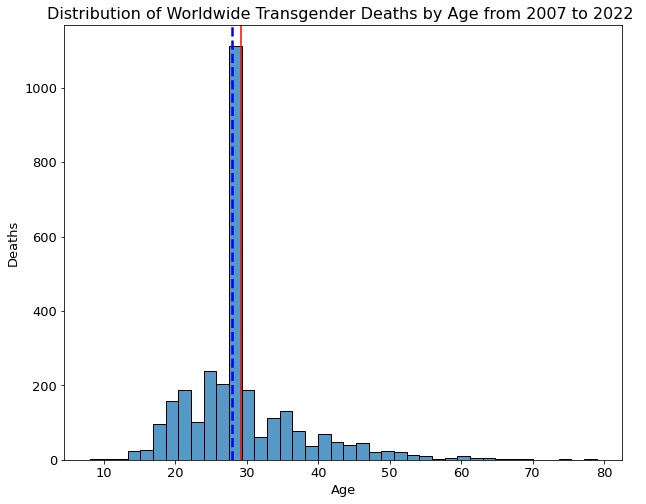

In [10]:
plt.figure(figsize=(10,8))
sns.histplot(data = train['age'], bins=40)
plt.title('Distribution of Worldwide Transgender Deaths by Age from 2007 to 2022 ', fontsize = 16)
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Deaths', fontsize = 13)
plt.xticks(fontsize= 13, rotation=0)
plt.yticks(fontsize= 13)
plt.axvline(x=train.age.median(),
            color='blue',
            ls='--', 
            lw=2.5)
plt.axvline(x=train.age.mean(),
            color='red');
# plt.savefig('wwtransdeathsage.png')

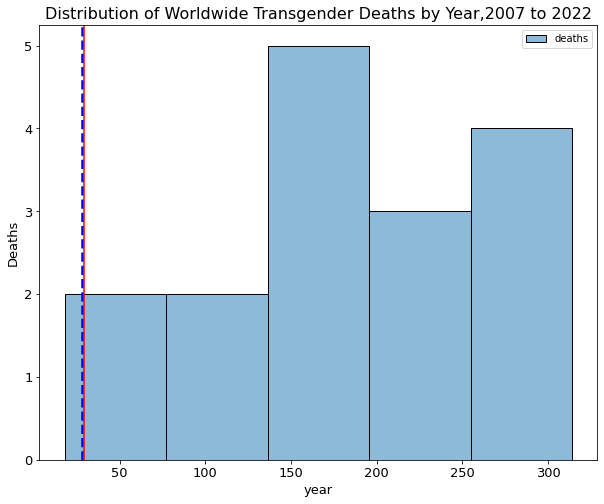

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(data = pd.DataFrame(train.groupby('year')['deaths'].sum()))
plt.title('Distribution of Worldwide Transgender Deaths by Year,2007 to 2022', fontsize = 16)
plt.xlabel('year', fontsize = 13)
plt.ylabel('Deaths', fontsize = 13)
plt.xticks(fontsize= 13, rotation=0)
plt.yticks(fontsize= 13)
plt.axvline(x=train.age.median(),
            color='blue',
            ls='--', 
            lw=2.5)
plt.axvline(x=train.age.mean(),
            color='red');

# plt.savefig('wwtransdeathsyears.png')

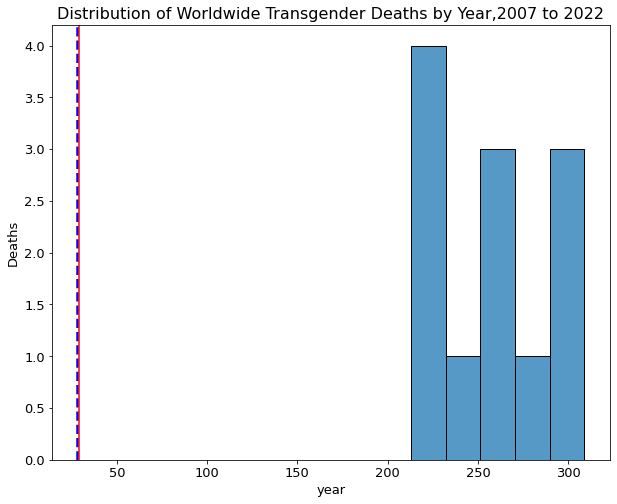

In [46]:
plt.figure(figsize=(10,8))
train['date'] = pd.to_datetime(train['date'])


sns.histplot(data = train.groupby(train['date'].dt.strftime('%B'))['deaths'].sum().sort_values())
plt.title('Distribution of Worldwide Transgender Deaths by Year,2007 to 2022', fontsize = 16)
plt.xlabel('year', fontsize = 13)
plt.ylabel('Deaths', fontsize = 13)
plt.xticks(fontsize= 13, rotation=0)
plt.yticks(fontsize= 13)
plt.axvline(x=train.age.median(),
            color='blue',
            ls='--', 
            lw=2.5)
plt.axvline(x=train.age.mean(),
            color='red');

# plt.savefig('wwtransdeathsyears.png')

Text(0.5, 1.0, 'Sum of Transgender Deaths by Month from 2007 to 2022')

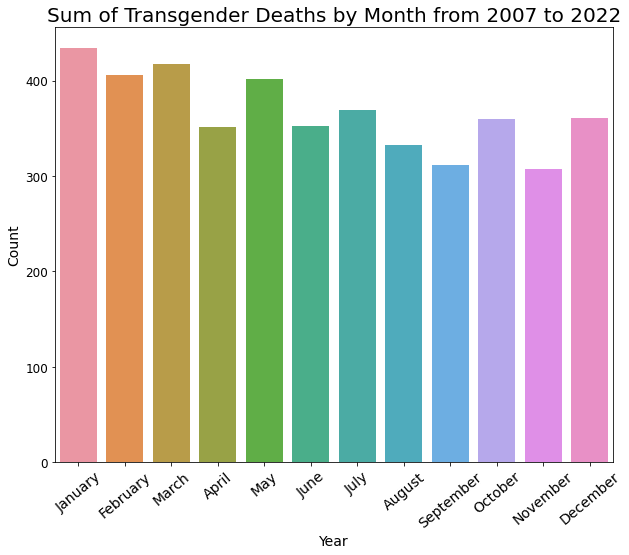

In [99]:
tdor['deaths']=1
tdor['date'] = pd.to_datetime(tdor['date'])
monthtdor=tdor.groupby(tdor['date'].dt.strftime('%B'))['deaths'].sum().sort_values()
tdorla = pd.DataFrame(monthtdor)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tdorla = tdorla.reindex(new_order, axis=0)
tdorla.reset_index(inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(data=tdorla, x='date', y='deaths')
plt.xlabel('Year', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.xticks(size=14, rotation = 40)
plt.title('Sum of Transgender Deaths by Month from 2007 to 2022', size=20)

Text(0.5, 1.0, 'Sum of Transgender Deaths by Month from 2007 to 2022')

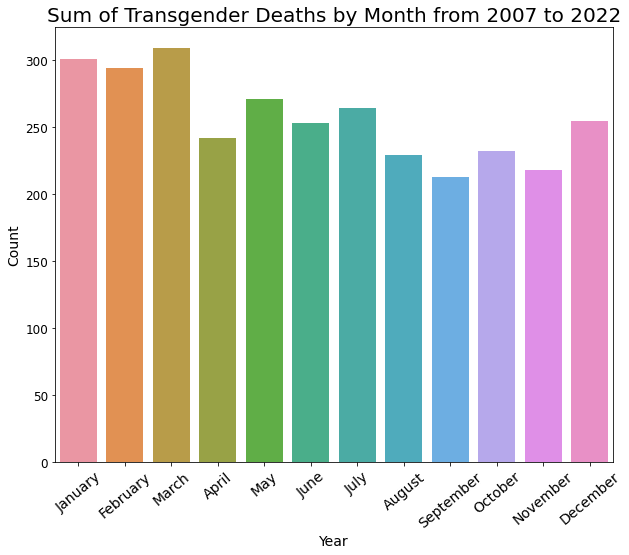

In [98]:
train['deaths']=1
train['date'] = pd.to_datetime(train['date'])
monthtrain=train.groupby(train['date'].dt.strftime('%B'))['deaths'].sum().sort_values()
trainla = pd.DataFrame(monthtrain)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trainla = trainla.reindex(new_order, axis=0)
trainla.reset_index(inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(data=trainla, x='date', y='deaths')
plt.xlabel('Year', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.xticks(size=14, rotation = 40)
plt.title('Sum of Transgender Deaths by Month from 2007 to 2022', size=20)

Text(0.5, 1.0, 'Sum of Transgender Deaths by Month from 2007 to 2022')

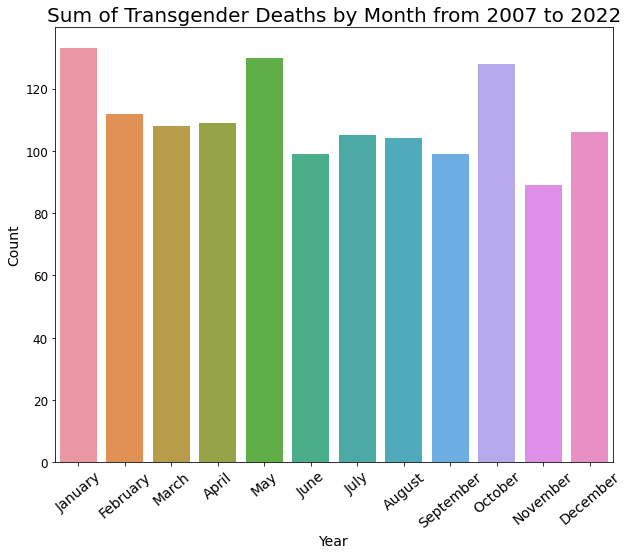

In [100]:
test['deaths']=1
test['date'] = pd.to_datetime(test['date'])
monthtest=test.groupby(test['date'].dt.strftime('%B'))['deaths'].sum().sort_values()
testla = pd.DataFrame(monthtest)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
testla = testla.reindex(new_order, axis=0)
testla.reset_index(inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(data=testla, x='date', y='deaths')
plt.xlabel('Year', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.xticks(size=14, rotation = 40)
plt.title('Sum of Transgender Deaths by Month from 2007 to 2022', size=20)

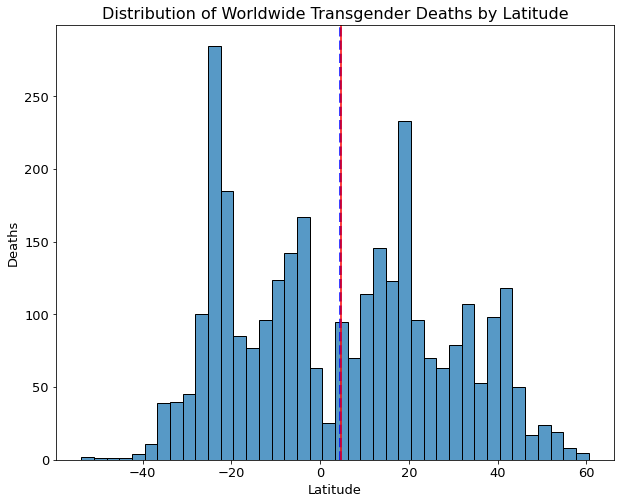

In [12]:
plt.figure(figsize=(10,8))
sns.histplot(data = train['latitude'], bins=40)
plt.title('Distribution of Worldwide Transgender Deaths by Latitude', fontsize = 16)
plt.xlabel('Latitude', fontsize = 13)
plt.ylabel('Deaths', fontsize = 13)
plt.xticks(fontsize= 13, rotation=0)
plt.yticks(fontsize= 13)
plt.axvline(x=train.latitude.median(),
            color='blue',
            ls='--', 
            lw=2.5)
plt.axvline(x=train.latitude.mean(),
            color='red');
# plt.savefig('wwtransdeathslatitude.png')

n: The above image shows the distribution of  Worldwide transgender deaths by latitude.

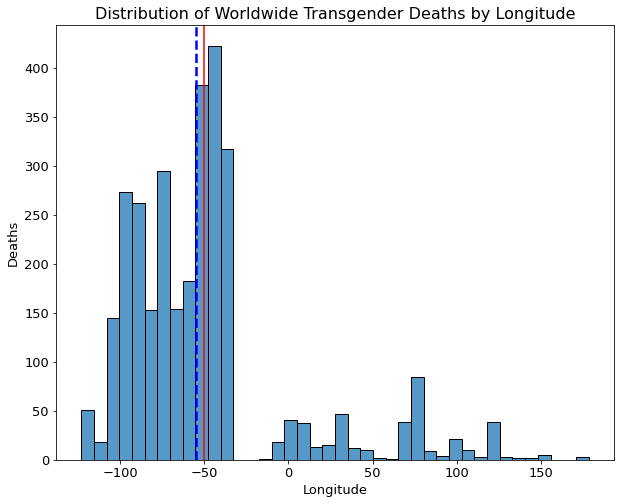

In [13]:
plt.figure(figsize=(10,8))
sns.histplot(data = train['longitude'], bins=40)
plt.title('Distribution of Worldwide Transgender Deaths by Longitude', fontsize = 16)
plt.xlabel('Longitude', fontsize = 13)
plt.ylabel('Deaths', fontsize = 13)
plt.xticks(fontsize= 13, rotation=0)
plt.yticks(fontsize= 13)
plt.axvline(x=train.longitude.median(),
            color='blue',
            ls='--', 
            lw=2.5)
plt.axvline(x=train.longitude.mean(),
            color='red');
# plt.savefig('wwtransdeathslongitude.png')

n: The above image shows the distribution of  Worldwide transgender deaths by longitude.

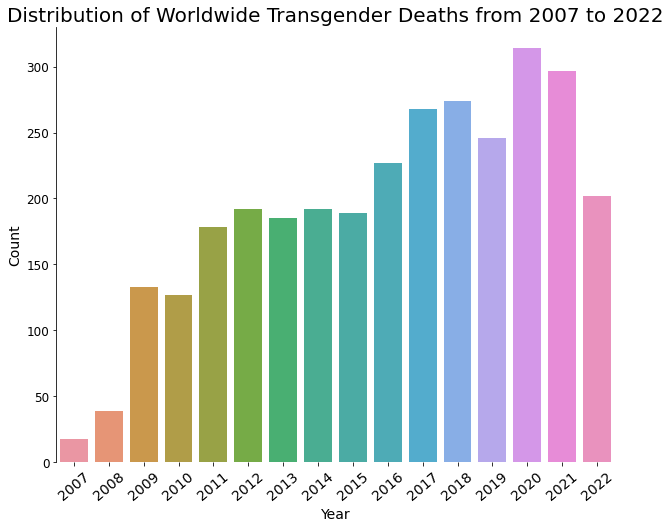

In [14]:
years = pd.DataFrame(train.groupby('year')['deaths'].sum()).reset_index()
years['year']=years['year'].astype(int)
plt.figure(figsize=(10,8))
sns.barplot(data=years, x='year', y='deaths')
plt.xlabel('Year', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.xticks(size=14, rotation = 40)
plt.title('Distribution of Worldwide Transgender Deaths from 2007 to 2022', size=20)
sns.despine(left=False, bottom=True);
# plt.savefig('wwtransdeathsyears.png')

n: The above image shows the distribution of  Worldwide transgender deaths from 2007 to 2022.

In [15]:
years.head()

,year,deaths
0,2007,18
1,2008,39
2,2009,133
3,2010,127
4,2011,178


In [16]:


by_usa = train[train['country']=='United States of America']

capita_usa = pd.DataFrame(by_usa.groupby('state_province')['deaths'].sum())
capita_usa = capita_usa.reset_index()

usa_population = pd.read_csv('../Data/population_data/usa_population.csv')

usa_population.rename(columns = {'state':'state_province'}, inplace=True)

usa_population['population']=usa_population['population'].str.replace(',','').astype(int)

capita_usa = pd.merge(capita_usa, usa_population, on="state_province")

capita_usa['deaths_per_capita'] = capita_usa['deaths']/capita_usa['population']

capita_usa
capita_usa.sort_values(by='deaths',ascending=False,inplace=True)

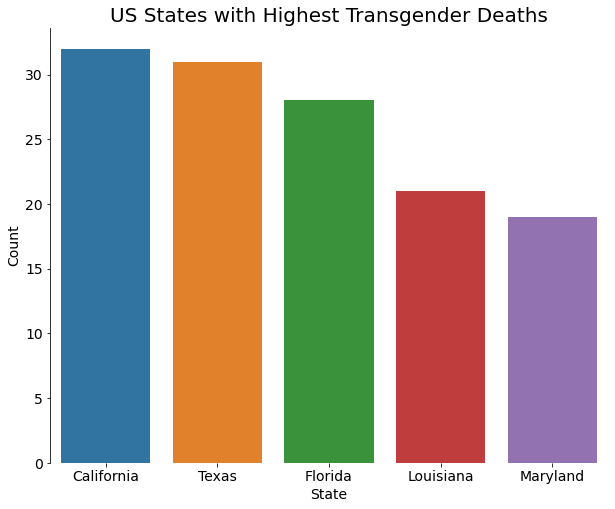

In [17]:
# plotting states with highest amount of transgender deaths
capita_usa.sort_values(by='deaths',ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(data=capita_usa.head(5), x='state_province', y='deaths')
plt.xlabel('State', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=14)
plt.xticks(size=14)
plt.title('US States with Highest Transgender Deaths', size=20)
sns.despine(left=False, bottom=True);
# plt.savefig('usstatesdeaths')

n: The above image shows the top 5 US States with the highest amount of transgender deaths.

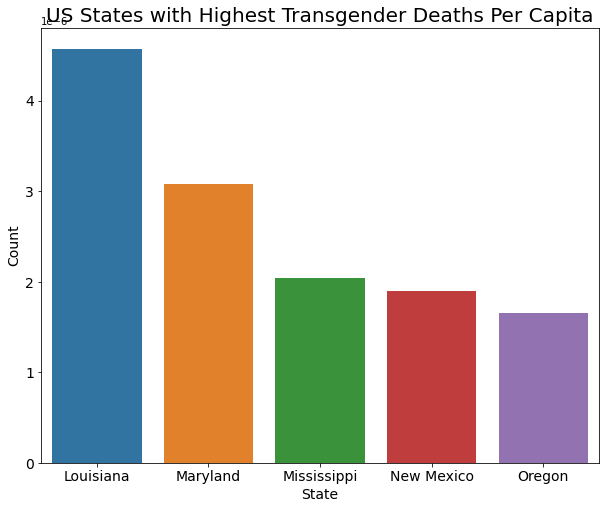

In [18]:
# plotting states with highest amount of transgender deaths
capita_usa.sort_values(by='deaths_per_capita',ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(data=capita_usa.head(5), x='state_province', y='deaths_per_capita')
plt.xlabel('State', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=14)
plt.xticks(size=14)
plt.title('US States with Highest Transgender Deaths Per Capita', size=20);
# plt.savefig('usstatesdeathscapita');

n: The above image shows the top 5 US States with the highest amount of transgender deaths per capita.

In [19]:
# creating per capita column for deaths by country
country_counts = train['country'].value_counts()

# converting to df and assigning new names to the columns
df_country_counts = pd.DataFrame(country_counts)
df_country_counts = df_country_counts.reset_index()
df_country_counts.columns = ['country', 'deaths'] # change column names
df_country_counts
# reading in csv with 2022 country populations 
country_population = pd.read_csv('../Data/population_data/country_population.csv')
# changing discrepancies in country names
country_population['country'] = country_population['country'].replace({'United Kingdom':'United Kingdom (Great Britain)','South Korea':'Korea, Republic of','Trinidad and Tobago':'Trinidad & Tobago', 'Russia':'Russian Federation','Moldova':'Moldova, Republic of','Ivory Coast':"Côte D'ivoire (Ivory Coast)",'Iran':'Islamic Republic of Iran','United States':'United States of America'})
country_population = country_population.iloc[:,:3]
# merging population and deaths dataframes
capita_country = pd.merge(df_country_counts, country_population, on="country")
# creating deaths per capita column from deaths divided by population
capita_country['population'] = capita_country['population'] * 1000 
capita_country['deaths_per_capita']=capita_country['deaths']/capita_country['population']

capita_country

,country,deaths,CCA3,population,deaths_per_capita
0,Brazil,1252,BR,215313000,5.814791e-06
1,Mexico,426,MX,127504000,3.341072e-06
2,United States of America,330,US,338290000,9.754944e-07
3,Colombia,156,CO,51874000,3.007287e-06
4,Argentina,93,AR,45510000,2.043507e-06
...,...,...,...,...,...
69,Poland,1,PL,39857000,2.508970e-08
70,Côte D'ivoire (Ivory Coast),1,CI,28161000,3.551010e-08
71,Kenya,1,KE,54027000,1.850926e-08
72,Finland,1,FI,5541000,1.804728e-07


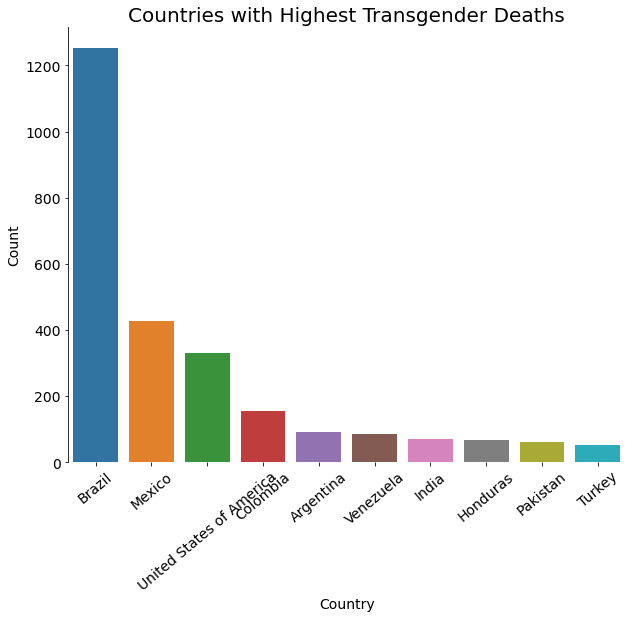

In [20]:
# plotting states with highest amount of transgender deaths
capita_country.sort_values(by='deaths',ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(data=capita_country.head(10), x='country', y='deaths')
plt.xlabel('Country', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=14)
plt.xticks(size=14, rotation = 40)
plt.title('Countries with Highest Transgender Deaths', size=20)
sns.despine(left=False, bottom=True);
# plt.savefig('countriesdeaths')

n: The above image shows the top 10 countries with the highest amount of transgender deaths.

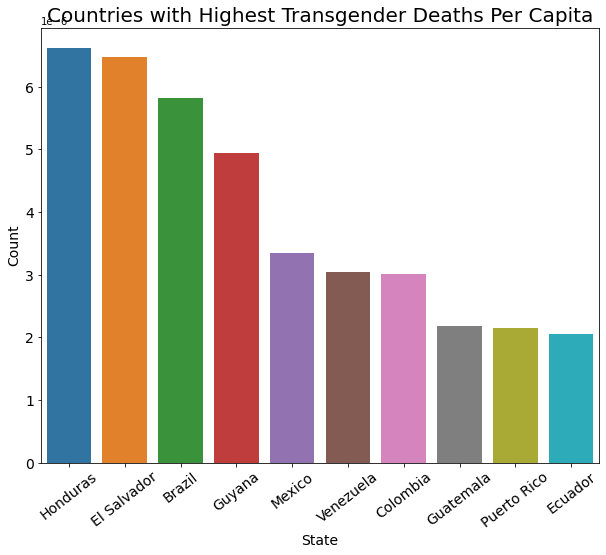

In [21]:
# plotting countries with highest amount of transgender deaths
capita_country.sort_values(by='deaths_per_capita',ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(data=capita_country.head(10), x='country', y='deaths_per_capita')
plt.xlabel('State', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=14)
plt.xticks(size=14, rotation = 38)
plt.title('Countries with Highest Transgender Deaths Per Capita', size=20);
# plt.savefig('countriesdeathscapita');

n: The above image shows the top 10 countries with the highest amount of transgender deaths per capita.

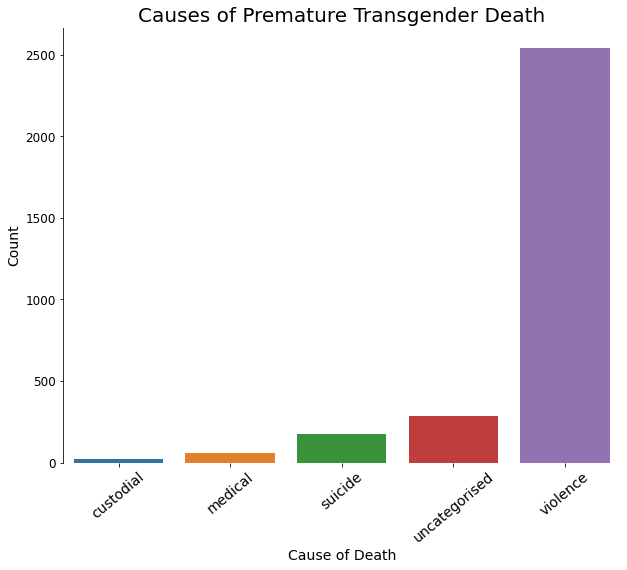

In [29]:
train['deaths']=1
years = pd.DataFrame(train.groupby('category')['deaths'].sum()).reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data=years, x='category', y='deaths')
plt.xlabel('Cause of Death', size=14)
plt.ylabel('Count', size=14)
plt.yticks(size=12)
plt.xticks(size=14, rotation = 40)
plt.title('Causes of Premature Transgender Death', size=20)
sns.despine(left=False, bottom=True);

n: The above image shows the category of causes of premature deaths in transgender people.